In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_pickle('dataSet.pkl')

In [3]:
df_train.columns

Index(['Comunidades y Ciudades Autónomas', 'Provincias', 'Periodo',
       'NumCompraVentas', 'TotalPoblación', 'PrecioVivienda'],
      dtype='object')

In [4]:
df_train

,Comunidades y Ciudades Autónomas,Provincias,Periodo,NumCompraVentas,TotalPoblación,PrecioVivienda
0,Total Nacional,Total Nacional,2022M01,52684.0,47432805.0,138742.0
1,Total Nacional,Total Nacional,2021M07,49732.0,47331545.0,133652.0
2,Total Nacional,Total Nacional,2021M01,40213.0,47398695.0,127831.0
3,Total Nacional,Total Nacional,2020M07,32751.0,47355685.0,128255.0
4,Total Nacional,Total Nacional,2020M01,47017.0,47332614.0,126695.0
...,...,...,...,...,...,...
1638,19 Melilla,52 Melilla,2009M01,33.0,73361.0,135458.0
1639,19 Melilla,52 Melilla,2008M07,71.0,72213.0,133498.0
1640,19 Melilla,52 Melilla,2008M01,79.0,71244.0,135752.0
1641,19 Melilla,52 Melilla,2007M07,83.0,70080.0,132239.0


# Datos
- Comunidades y Ciudades Autónomas: Esta columna contiene el nombre de la comunidad autónoma a la que hace referencia o "Total nacional" si se refiere a toda españa

- Provincias: Esta columna contiene el nombre de la provincia a la que hace referencia o "Total nacional" si se refiere a toda españa

- Periodo: Esta columna indica la fecha en la que se tomaron los datos, que va desde Enero de 2007 hasta Enero de 2022

- NumCompraVentas: Esta columna indica el numero de transmisiones patrimoniales que hubo en esa provincia (o toda españa) en en el periodo indicado

- TotaPoblación: Esta columna indica el número de población que había en esa provincia (o toda españa) en en el periodo indicado

- PrecioVivienda: Esta columna indica el precio medio de la vivienda (tanto nueva como de segunda mano) en esa provincia (o toda españa) en en el periodo indicado -> Es la variable target

In [5]:
# Lo primero de todo es desglosar las columnas por su tipo
df_train.columns.to_series().groupby(df_train.dtypes).groups

{float64: ['NumCompraVentas', 'TotalPoblación', 'PrecioVivienda'], object: ['Comunidades y Ciudades Autónomas', 'Provincias', 'Periodo']}

In [6]:
#Analizamos primero las columnas númericas
df_train.describe()

,NumCompraVentas,TotalPoblación,PrecioVivienda
count,1643.000000,1.643000e+03,1643.000000
mean,1572.932441,1.757390e+06,119806.125989
std,5900.354316,6.319045e+06,18960.845997
min,0.000000,6.896800e+04,91832.000000
25%,232.000000,3.241155e+05,102700.000000
50%,483.000000,6.349830e+05,115386.000000
75%,932.500000,1.067004e+06,134773.500000
max,83713.000000,4.743280e+07,186732.000000


#### La provincia con el precio medio más bajo de vivienda vale: 91.832 euros
#### La provincia con el precio medio más alto de vivienda vale: 186.732 euros
#### La provincia con menos habitantes tiene: 68968 habitantes
#### La provincia (en este caso es toda españa) con más habitantes tiene: 4.743280e+07 habitantes

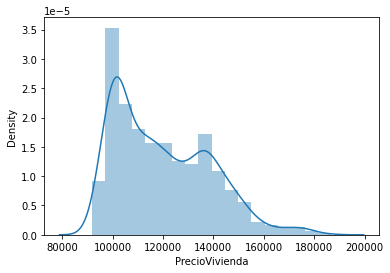

In [7]:
#Lo primero de todo, es analizar el target, es decir, el precio de la vivienda
#histogram
sns.distplot(df_train['PrecioVivienda']);

In [8]:
#IMPORTANTE -> Excluir los totales de españa, porque mandchan los datos
#EXCLUIMOS
df_exa = df_train.loc[df_train['Comunidades y Ciudades Autónomas']!='Total Nacional']
df_exa

,Comunidades y Ciudades Autónomas,Provincias,Periodo,NumCompraVentas,TotalPoblación,PrecioVivienda
31,01 Andalucía,04 Almería,2022M01,1220.0,723899.0,133300.0
32,01 Andalucía,11 Cádiz,2022M01,1417.0,1259339.0,133300.0
33,01 Andalucía,14 Córdoba,2022M01,675.0,777414.0,133300.0
34,01 Andalucía,18 Granada,2022M01,1204.0,929968.0,133300.0
35,01 Andalucía,21 Huelva,2022M01,688.0,532865.0,133300.0
...,...,...,...,...,...,...
1638,19 Melilla,52 Melilla,2009M01,33.0,73361.0,135458.0
1639,19 Melilla,52 Melilla,2008M07,71.0,72213.0,133498.0
1640,19 Melilla,52 Melilla,2008M01,79.0,71244.0,135752.0
1641,19 Melilla,52 Melilla,2007M07,83.0,70080.0,132239.0


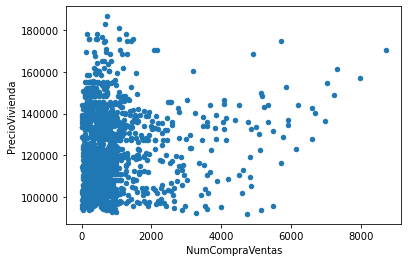

In [9]:
#Analizamos la relacion entre el numero de compraventas y el target (precio de la vivienda)
#scatter plot NumCompraVentas/PrecioVivienda
var = 'NumCompraVentas'
data = pd.concat([df_exa['PrecioVivienda'], df_exa[var]], axis=1)
data.plot.scatter(x=var, y='PrecioVivienda');

[Text(0.5, 1.0, 'Evolución del precio de la vivienda en el tiempo en todas las comunidades de españa')]

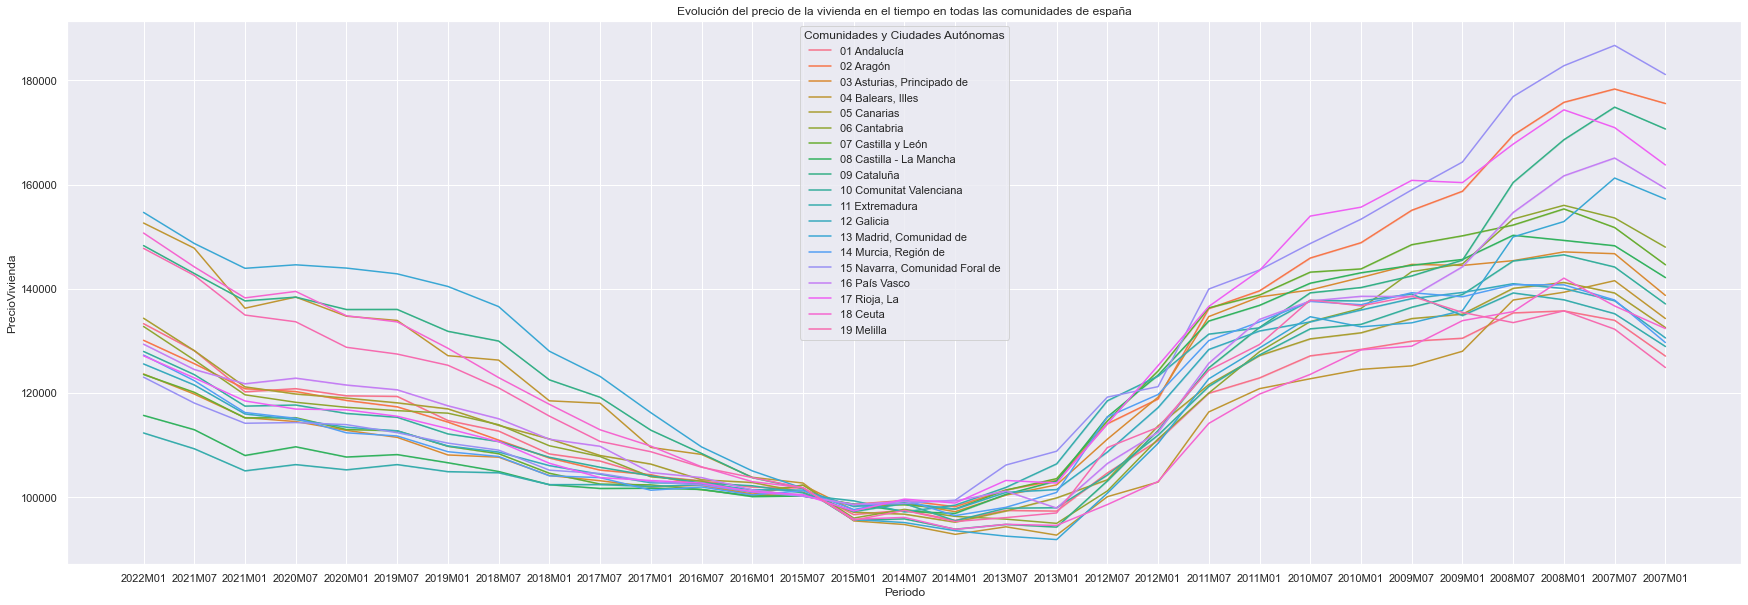

In [10]:
#Obtener la evolucion del precio de la vivienda en todas las comunidades de españa
sns.set(rc = {'figure.figsize':(30,10)})
sns.lineplot(data=df_exa, x="Periodo", y="PrecioVivienda", hue='Comunidades y Ciudades Autónomas').set (title = 'Evolución del precio de la vivienda en el tiempo en todas las comunidades de españa')
#Se observa el mismo patrón en todas, pero en algunas mas pronunciado que en otras

[Text(0.5, 1.0, 'Evolución del numero de compra ventas de vivienda en el tiempo en todas las comunidades de españa')]

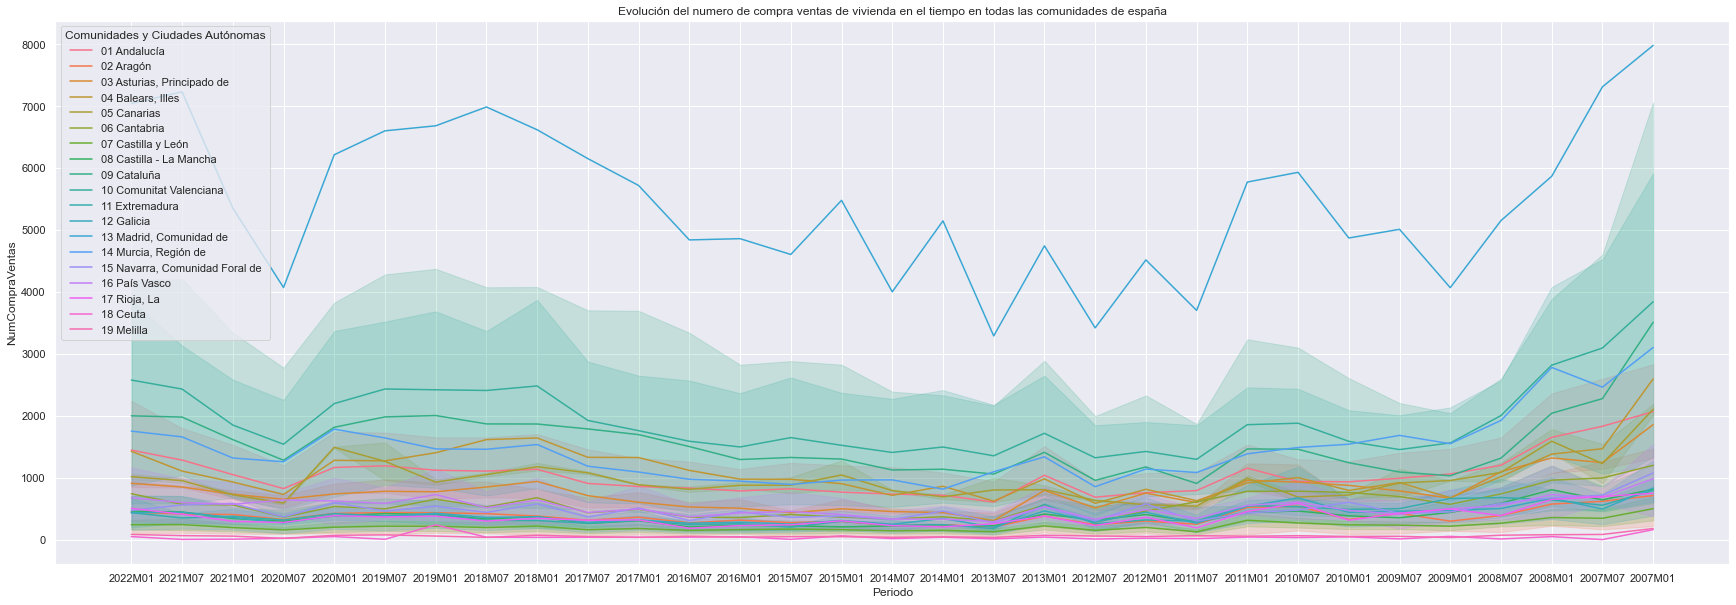

In [11]:
#obtener la evolucion de las compraventas en todas las comunidades de españa
sns.set(rc = {'figure.figsize':(30,10)})
sns.lineplot(data=df_exa, x="Periodo", y="NumCompraVentas", hue="Comunidades y Ciudades Autónomas").set (title = 'Evolución del numero de compra ventas de vivienda en el tiempo en todas las comunidades de españa')

[Text(0.5, 1.0, 'Evolución de la población en todas las comunidades de españa')]

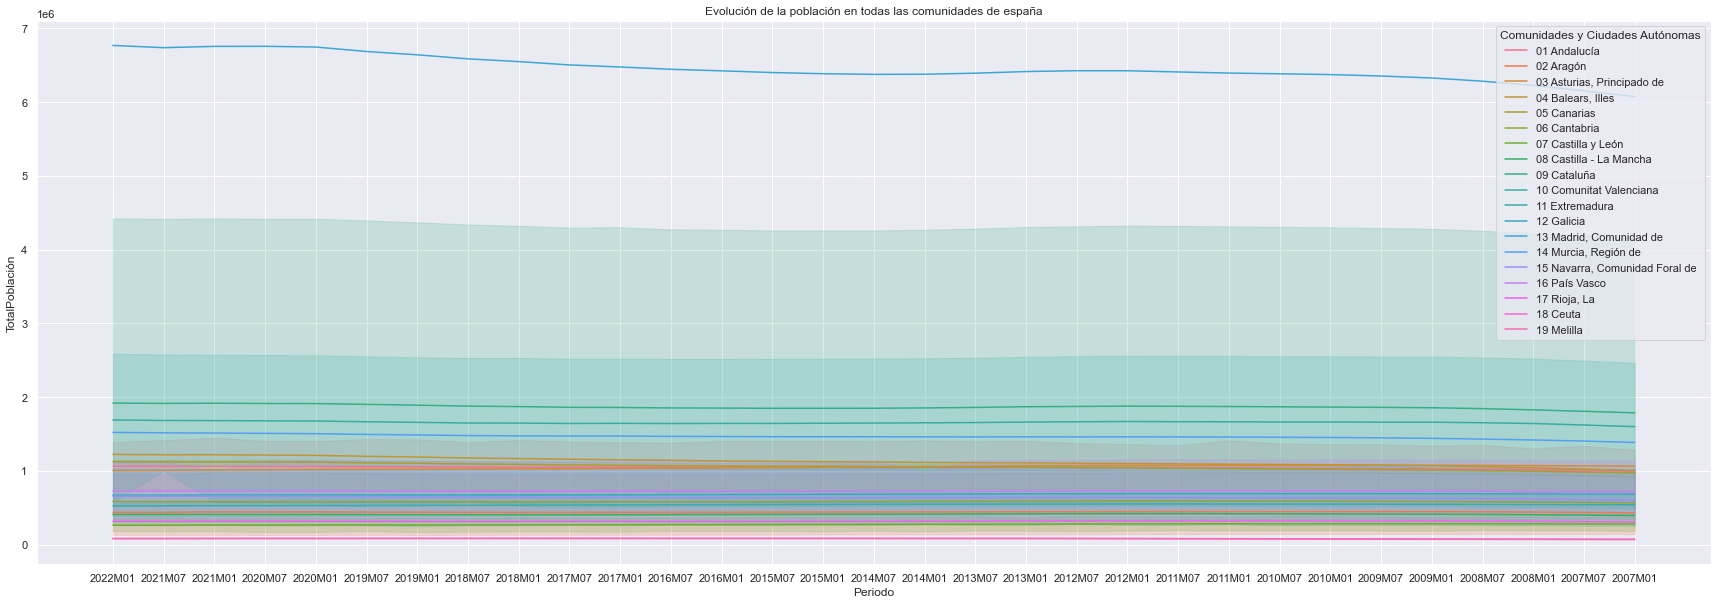

In [12]:
#Obtener la evolución de la población en todas las comunidades de españa
sns.set(rc = {'figure.figsize':(30,10)})
sns.lineplot(data=df_exa, x="Periodo", y="TotalPoblación", hue="Comunidades y Ciudades Autónomas").set(title = 'Evolución de la población en todas las comunidades de españa')

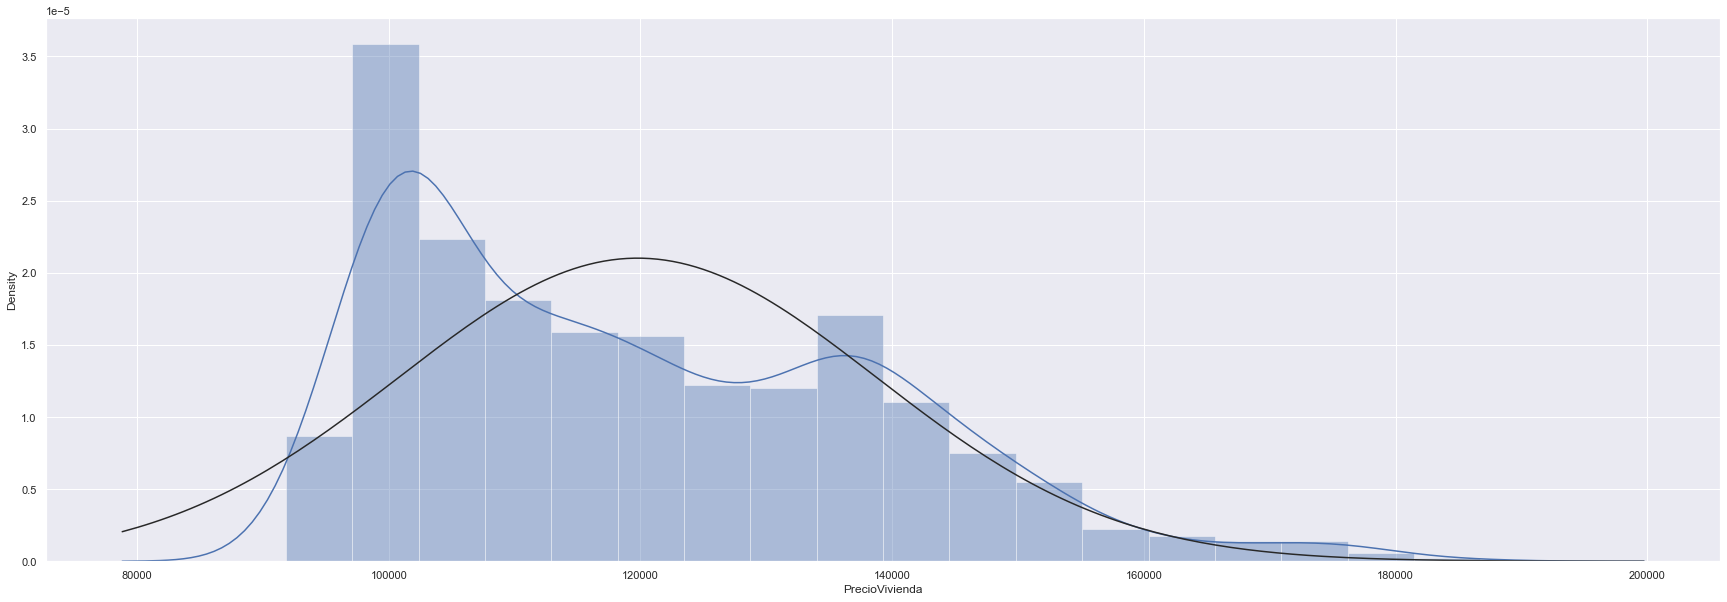

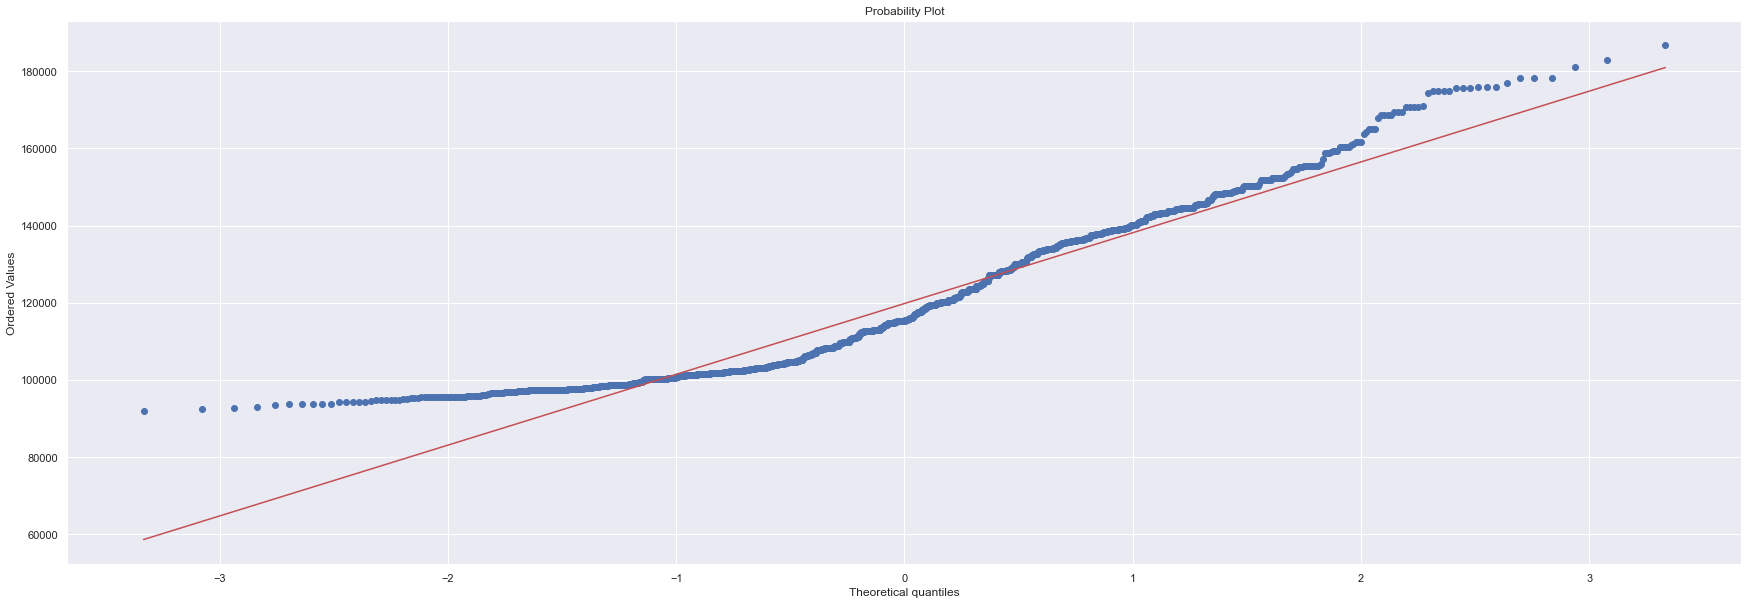

In [13]:
#histogram and normal probability plot PARA TODO EL DATASET, MENOS LO DE TOTAL NACIONAL
sns.distplot(df_exa['PrecioVivienda'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_exa['PrecioVivienda'], plot=plt)

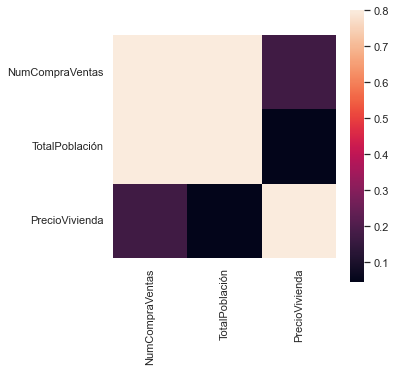

In [14]:
#correlation matrix
corrmat = df_exa.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

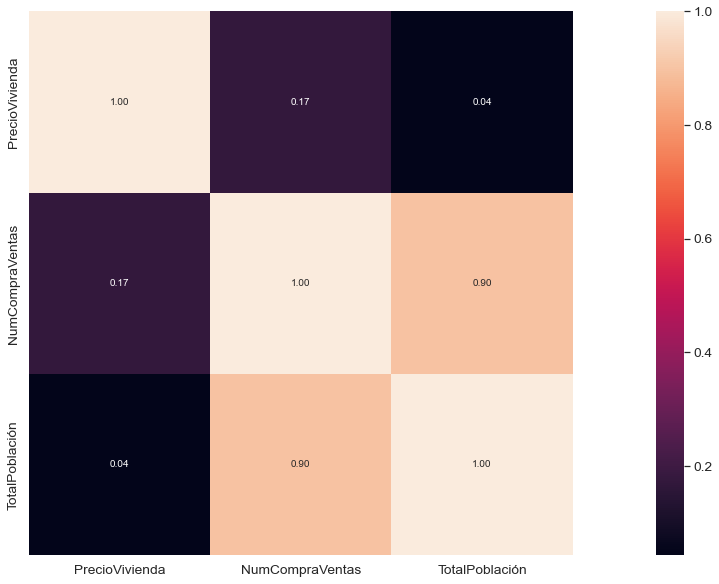

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PrecioVivienda')['PrecioVivienda'].index
cm = np.corrcoef(df_exa[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
#AHORA NORMALIZAMOS LOS DATOS
df_exa['PrecioVivienda'] = np.log(df_exa['PrecioVivienda'])

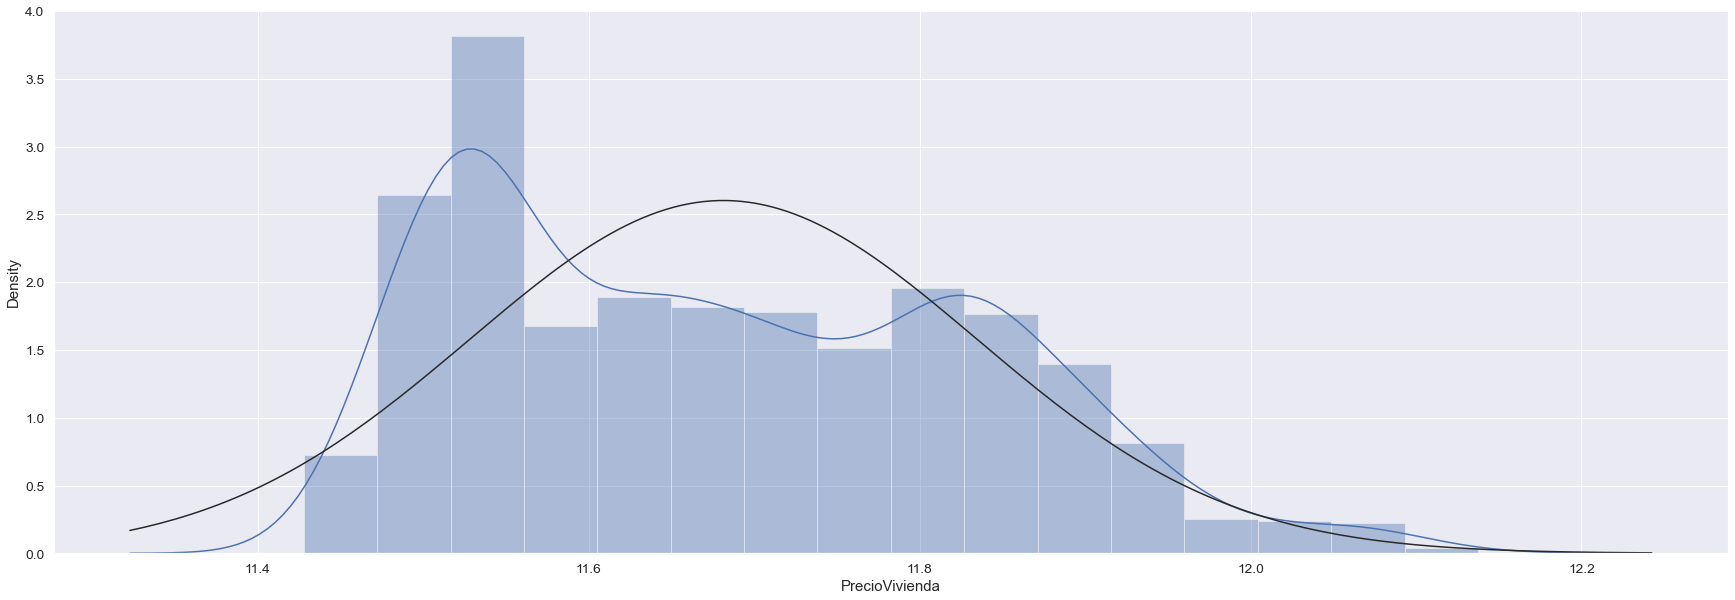

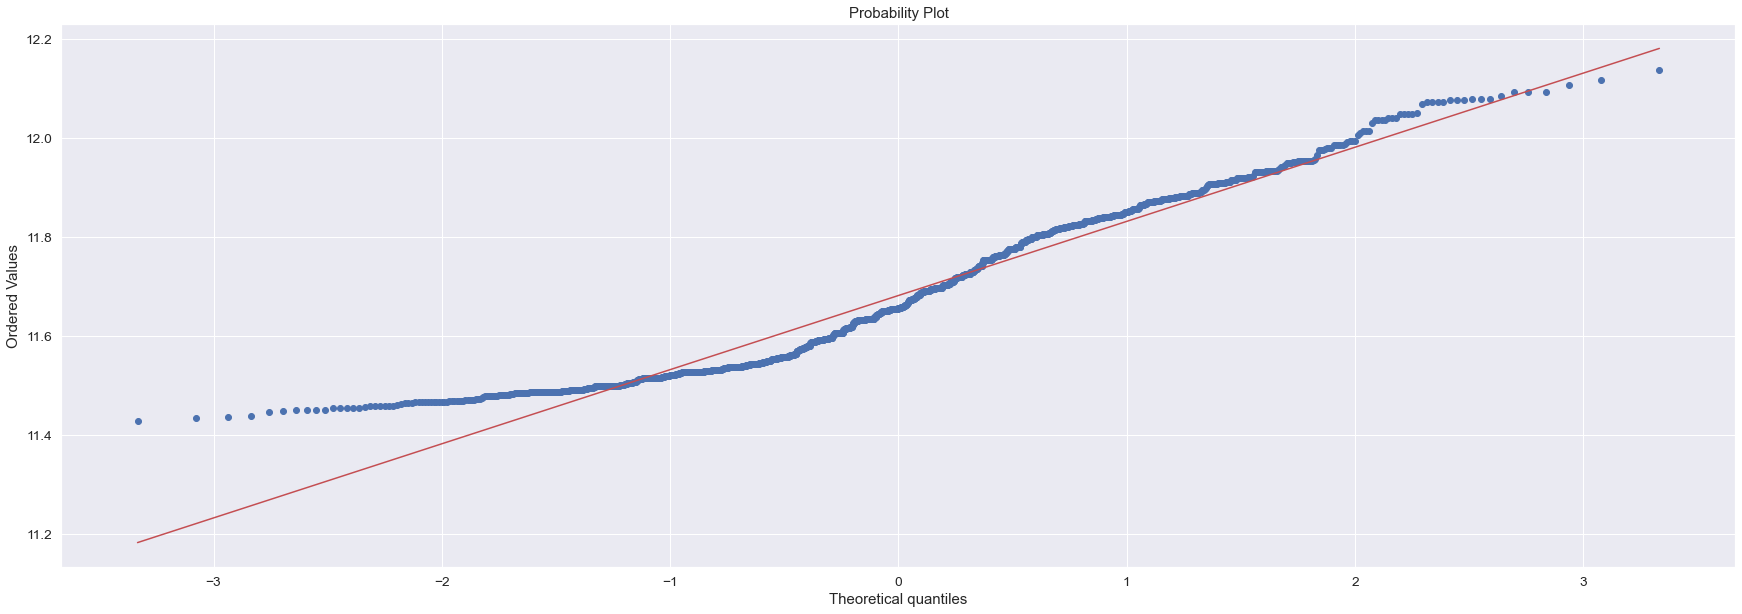

In [17]:
#transformed histogram and normal probability plot
sns.distplot(df_exa['PrecioVivienda'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_exa['PrecioVivienda'], plot=plt)

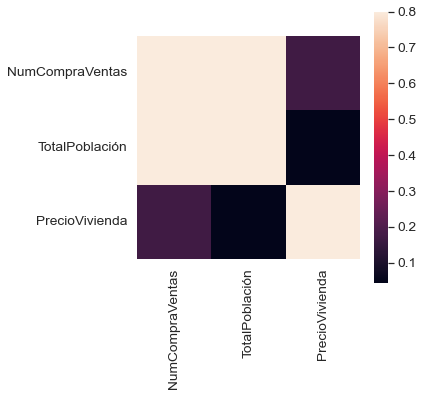

In [18]:
#correlation matrix CON LOS DATOS NORMALIZADOS
corrmat = df_exa.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

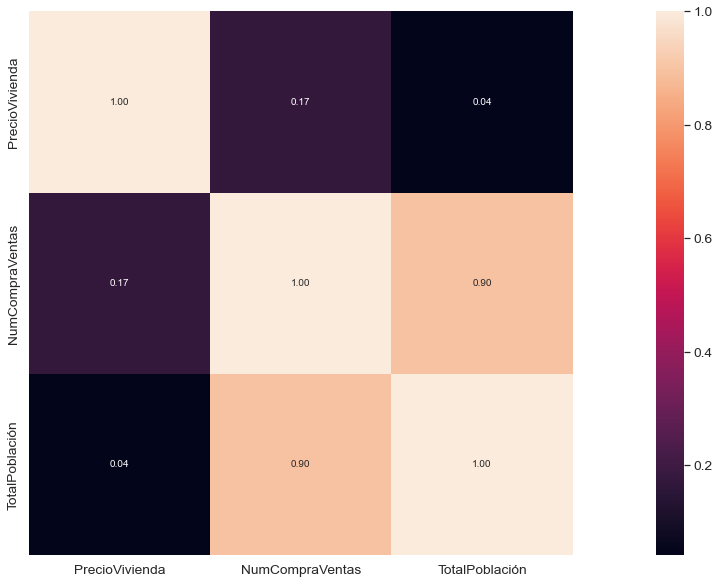

In [19]:
#saleprice correlation matrix CON LOS DATOS NORMALIZADOS
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PrecioVivienda')['PrecioVivienda'].index
cm = np.corrcoef(df_exa[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
df_exa
#Exporto el dataFrame de toda españa
df_exa.to_pickle('df_spain.pkl')
df_exa.to_csv('./df_spain.csv')

In [21]:
df_exa

,Comunidades y Ciudades Autónomas,Provincias,Periodo,NumCompraVentas,TotalPoblación,PrecioVivienda
31,01 Andalucía,04 Almería,2022M01,1220.0,723899.0,11.800358
32,01 Andalucía,11 Cádiz,2022M01,1417.0,1259339.0,11.800358
33,01 Andalucía,14 Córdoba,2022M01,675.0,777414.0,11.800358
34,01 Andalucía,18 Granada,2022M01,1204.0,929968.0,11.800358
35,01 Andalucía,21 Huelva,2022M01,688.0,532865.0,11.800358
...,...,...,...,...,...,...
1638,19 Melilla,52 Melilla,2009M01,33.0,73361.0,11.816417
1639,19 Melilla,52 Melilla,2008M07,71.0,72213.0,11.801842
1640,19 Melilla,52 Melilla,2008M01,79.0,71244.0,11.818585
1641,19 Melilla,52 Melilla,2007M07,83.0,70080.0,11.792366
